<span style="font-size:1.5em;">**Εργασία Μηχανικής Μάθησης - ΜΗΧΜΗΔΟΝΕΣ (Notebook 2)** </span>

Το παρόν notebook δημιουργήθηκε για την επίλυση εργασίας "Αλγόριθμοι αναγνώρισης δραστηριότητας από σήμα επιταχυνσιομέτρου" που ανατέθηκε στο μάθημα "Ειδικά Θέματα Ι (Μηχανική Μάθηση)" του μεταπτυχιακού προγράμματος μας. Συνοπτικά αυτή καθαυτή περιγράφεται στο συνοδευόμενο Notebook_1.

Το notebook αυτό αποτελεί το δεύτερο από μια σειρά notebooks που περιέχουν κώδικα ο οποίος χρησιμοποιήθηκε για την επίλυση της εργασίας και αναφέρεται στην LOSO (Leave-One-Subject-Out) εκπαίδευση των δεδομένων. Σ’ αυτήν, εκπαιδεύουμε κάθε φορά με τα δεδομένα από τους συμμετέχοντες $1, \dots, i-1, i+1, \dots, n$ (όπου $n$ ο συνολικός αριθμός συμμετεχόντων) και αξιολογούμε στα δεδομένα του συμμετέχοντα $i$. Η διαδικασία αυτή εφαρμόζεται επαναληπτικά $n$ φορές. Προκύπτει έτσι ένας πίνακας σύγχυσης (confusion matrix) για κάθε συμμετέχοντα. Αθροίζοντας τους πίνακες σύγχυσης προκύπτει ένας τελικός πίνακας από τον οποίο μπορούμε να υπολογίσουμε και τις μετρικές αξιολόγησης. </br>

Ακόμη, η LOSO εκπαίδευση των δεδομένων θα γίνει με την χρήση τεσσάρων διαφορετικών μεθόδων:

* Μέθοδος των $k$-πλησιέστερων γειτώνων
* Χρήση δέντρων αποφάσεων
* Μέθοδο SVM (Support Vector Machine) με πυρήνα RBF (Radial Basis Function)
* Με νευρωνικό δίκτυο MLP (Multi-Layer Perceptron) με 1-2 κρυφά στρώματα και χρήση ορμής (momentum)

Τέλος, στο παρόν Notebook θα απαντηθούν και οι ερωτήσεις-ζητούμενα της εργασίας:
1. Για κάθε μία από τις παραπάνω μεθόδους ταξινόμησης, αναφέρετε ενδεικτικά αποτελέσματα από τη διαδικασία εύρεσης των βέλτιστων παραμέτρων. Επίσης, αναφέρετε τις βέλτιστες παραμέτρους που χρησιμοποιήσατε για την τελική εκπαίδευση των μοντέλων.
2. Για κάθε μία από τις παραπάνω μεθόδους ταξινόμησης, υπολογίστε τον πίνακα σύγχυσης και την ορθότητα (accuracy) της ταξινόμησης δραστηριοτήτων.
3. Με βάση τον πίνακα σύγχυσης (για κάθε μία από τις παραπάνω μεθόδους ταξινόμησης), ποιες δραστηριότητες συγχέει ο αλγόριθμος; Σχολιάστε γιατί μπορεί να συμβαίνει αυτό. Επίσης, σχολιάστε τυχόν διαφορές μεταξύ των 4 μοντέλων ταξινόμησης.

**Συγγραφείς**: Α.Α., Μουστάκας Γεώργιος, Παπαδόπουλος Φλωριάς, Φ.Ε.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Μέθοδος-$k$NN-" data-toc-modified-id="-Μέθοδος-$k$NN--1"><span class="toc-item-num">1&nbsp;&nbsp;</span><u> Μέθοδος $k$NN </u></a></span><ul class="toc-item"><li><span><a href="#Προαπαιτούμενα" data-toc-modified-id="Προαπαιτούμενα-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Προαπαιτούμενα</a></span></li><li><span><a href="#LOSO-Εκπαίδευση-με-$k$NN" data-toc-modified-id="LOSO-Εκπαίδευση-με-$k$NN-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>LOSO Εκπαίδευση με $k$NN</a></span></li><li><span><a href="#Σχόλια" data-toc-modified-id="Σχόλια-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Σχόλια</a></span></li></ul></li><li><span><a href="#-Μέθοδος-Δέντρων-Απόφασης-" data-toc-modified-id="-Μέθοδος-Δέντρων-Απόφασης--2"><span class="toc-item-num">2&nbsp;&nbsp;</span><u> Μέθοδος Δέντρων Απόφασης </u></a></span><ul class="toc-item"><li><span><a href="#Προαπαιτούμενα" data-toc-modified-id="Προαπαιτούμενα-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Προαπαιτούμενα</a></span></li><li><span><a href="#LOSO-Εκπαίδευση-με-δέντρα-αποφάσεων" data-toc-modified-id="LOSO-Εκπαίδευση-με-δέντρα-αποφάσεων-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LOSO Εκπαίδευση με δέντρα αποφάσεων</a></span></li><li><span><a href="#Σχόλια" data-toc-modified-id="Σχόλια-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Σχόλια</a></span></li></ul></li><li><span><a href="#-Μέθοδος-SVM-" data-toc-modified-id="-Μέθοδος-SVM--3"><span class="toc-item-num">3&nbsp;&nbsp;</span><u> Μέθοδος SVM </u></a></span><ul class="toc-item"><li><span><a href="#Προαπαιτούμενα" data-toc-modified-id="Προαπαιτούμενα-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Προαπαιτούμενα</a></span></li><li><span><a href="#LOSO-Εκπαίδευση-με-SVM" data-toc-modified-id="LOSO-Εκπαίδευση-με-SVM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LOSO Εκπαίδευση με SVM</a></span></li><li><span><a href="#Σχόλια" data-toc-modified-id="Σχόλια-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Σχόλια</a></span></li></ul></li><li><span><a href="#-Μέθοδος-MLP-" data-toc-modified-id="-Μέθοδος-MLP--4"><span class="toc-item-num">4&nbsp;&nbsp;</span><u> Μέθοδος MLP </u></a></span><ul class="toc-item"><li><span><a href="#Προαπαιτούμενα" data-toc-modified-id="Προαπαιτούμενα-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Προαπαιτούμενα</a></span></li><li><span><a href="#LOSO-Εκπαίδευση-με-MLP" data-toc-modified-id="LOSO-Εκπαίδευση-με-MLP-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LOSO Εκπαίδευση με MLP</a></span></li><li><span><a href="#Σχόλια" data-toc-modified-id="Σχόλια-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Σχόλια</a></span></li></ul></li><li><span><a href="#Σύγκριση-Μεθόδων" data-toc-modified-id="Σύγκριση-Μεθόδων-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Σύγκριση Μεθόδων</a></span></li></ul></div>

## <u> Μέθοδος $k$NN </u>

Η μέθοδος των $k$-πλησιέστερων γειτόνων (KNN) είναι ένας αλγόριθμος επιβλεπόμενης μηχανικής μάθησης που χρησιμοποιείται για κατηγοριοποίηση και παλινδρόμηση. Είναι ένας μη παραμετρικός αλγόριθμος, που σημαίνει ότι δεν κάνει καμία υπόθεση για την κατανομή των δεδομένων.

Η βασική ιδέα πίσω από τον αλγόριθμο KNN είναι να προβλέψει την κατηγορία ή την τιμή ενός δείγματος βασιζόμενος στην πλειοψηφία ή τη μέση τιμή των k πλησιέστερων γειτόνων του στον χώρο των χαρακτηριστικών. Δηλαδή, ο αλγόριθμος καθορίζει την κατηγορία ή την τιμή ενός νέου δείγματος εξετάζοντας τους $k$-πλησιέστερους γείτονες του στο σετ εκπαίδευσης.

Σκοπός μας είναι να βρούμε ποίο $k$ θα μας δώσει την βέλτιστη απόδοση και έπειτα να εξάγουμε τα ζητούμενα αποτελέσματα, χρησιμοποιώντας αυτό το $k$.

### Προαπαιτούμενα

Πριν ξεκινήσουμε την εκπαίδευση πρέπει να γίνει η εισαγωγή των δεδομένων που παράχθηκαν με την χρήση του κώδικα του Notebook_1, καθώς και των modules που χρειάζονται:

In [1]:
#modules
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# data input
pars = pd.read_csv("pars_standardized.csv")

### LOSO Εκπαίδευση με $k$NN

#### $\cdot$ Εύρεση βέλτιστου $k$

Θα ξεκινήσουμε βρίσκοντας την βέλτιστη τιμή για το $k$, το $k_{optimal}$. </br>
Για να γίνει αυτό, κάνουμε τους υπολογισμούς για διάφορες τιμές του $k$ και απεικονίζουμε το σφάλμα συναρτήσει της τιμής του $k$. Ακόμη, για τα επιμέρους βήματα έχουν δωθεί εξηγήσεις πάνω στον κώδικα σαν σχόλια.

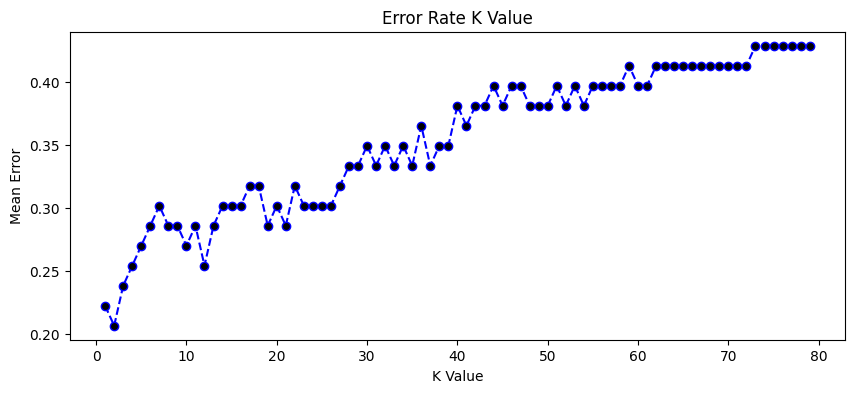

Optimal K: 2


In [2]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
groups = pars.iloc[:, 0].values

error = []
# Calculating error for K values between 1 and 80
for i in range(1, 80, 1):

    # Initialize classifier and confusion matrix
    knn = KNeighborsClassifier(n_neighbors=i)

    # Perform leave-one-subject-out cross validation
    logo = LeaveOneGroupOut()
    for train_index, test_index in logo.split(X, y, groups):
        
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit KNN classifier and predict labels
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
    
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# Plotting error for all values of k
plt.figure(figsize=(10, 4))
plt.plot(range(1, 80, 1), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='black', markersize=6)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

# Calculation of k_optimal using the above results
min_error_index = np.argmin(error)
k_optimal = min_error_index + 1      # We add 1 cause python starts index from zero
print(f"Optimal K: {k_optimal}")

#### $\cdot$ Μέθοδος $k$-πλησιέστερων γειτόνων για $k=k_{optimal}$

Υπολογίζουμε πίνακα σύγχυσης και ορθότητα (accuracy) για το $k$ που βρήκαμε παραπάνω.

In [3]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
groups = pars.iloc[:, 0].values

# Initialize classifier and confusion matrix
knn = KNeighborsClassifier(n_neighbors=k_optimal)
cm = np.zeros((len(np.unique(y)), len(np.unique(y))))   # cm (confusion matrix)

total_fit_time_knn = 0  # Initialize total fit time

# Perform leave-one-subject-out cross validation
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(X, y, groups):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit KNN classifier and predict labels
    import time
    start = time.time()
    knn.fit(X_train, y_train)
    end = time.time()
    fit_time = end - start  # Calculate fit time for this fold
    total_fit_time_knn += fit_time  # Add fit time to total
    y_pred = knn.predict(X_test)

    # Calculate confusion matrix and accuracy for this split
    labels = np.unique(pars['Activity'])
    cm += confusion_matrix(y_test, y_pred, labels=labels)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {groups[test_index][0]}: {acc}")

# Create DataFrame from confusion matrix and labels
cm_df = pd.DataFrame(cm.astype(int), columns=labels, index=labels)  

# Print total fit time
print(f"\nTotal fit time: {total_fit_time_knn} seconds")

# Calculate overall accuracy and print confusion matrix
overall_acc_knn = np.trace(cm) / np.sum(cm)
print(f"\nOverall accuracy: {overall_acc_knn}")
print("\nConfusion matrix:\n")
print(cm_df)

Accuracy for Participant 1: 0.7301587301587301
Accuracy for Participant 10: 0.6666666666666666
Accuracy for Participant 2: 0.7619047619047619
Accuracy for Participant 3: 0.7936507936507936
Accuracy for Participant 4: 0.7619047619047619
Accuracy for Participant 5: 0.6190476190476191
Accuracy for Participant 6: 0.7619047619047619
Accuracy for Participant 7: 0.8095238095238095
Accuracy for Participant 8: 0.8253968253968254
Accuracy for Participant 9: 0.7936507936507936

Total fit time: 0.01587677001953125 seconds

Overall accuracy: 0.7523809523809524

Confusion matrix:

            biking  downstairs  jogging  sitting  standing  upstairs  walking
biking          85           1        0        0         0         4        0
downstairs       1          70        0        0         0        15        4
jogging          0           0       90        0         0         0        0
sitting          0           0        0       72        18         0        0
standing         0           0      

### Σχόλια

1. Η μόνη παράμετρος που έχρηζε βελτιστοποίησης ήταν το $k$. Ο τρόπος που βρέθηκε αυτή η παράμετρος φαίνεται στον παραπάνω κώδικα και η βέλτιστη παράμετρος υπολογίσθηκε ως $k_{optimal}=2$ στην περίπτωση μας. </br>


2. Τα ζητούμενα βρίσκονται στο προηγούμενο κελί κώδικα. </br>


3. Με βάση τον παραπάνω πίνακα ταξινόμησης, ο αλγόριθμος συγχέει: </br>
   -Την κλάση "standing" με την κλάση "sitting", κάτι που φαίνεται καθώς από τα 90 παράθυρα που έπρεπε να ταξινομηθούν ως standing, μόνο τα 27 ταξινομήθηκαν σωστά και τα υπόλοιπα ταξινομήθηκαν ως "sitting". </br>
   -Την κλάση "upstairs" με την κλάση "downstairs" (σε μικρότερο βαθμό από πριν), καθώς μόνο τα $2/3$ του "upstairs" ταξινομήθηκαν σωστά και σχεδόν όλα τα υπόλοιπα ταξινομήθηκαν ως "downstairs". </br>
   
   Οι δύο παραπάνω συγχήσεις είναι λογικές απόριες της χρήσης μόνο δεδομένων από το επιταχυνσιόμετρο και κατ' επέκταση του μέτρου αυτών των ενδείξεων. Έτσι, οι τιμές για τις κλάσεις "standing" και "sitting" θα 'ναι πολύ μικρές και παρόμοιας τάξης, με αποτέλεσμα να δυσκολεύουν να γίνει μια τέλεια ταξινόμηση. Παρόμοια σκέψη γίνεται και για τις κλάσεις "upstairs" και "downstairs".

___

## <u> Μέθοδος Δέντρων Απόφασης </u>

Σε αυτήν τη μέθοδο, ένα δέντρο αποτελείται από κόμβους και ακμές, και χρησιμοποιείται για να διαχωρίσει ένα σύνολο δεδομένων σε διάφορες κατηγορίες. Στον κόμβο του δέντρου, λαμβάνεται μια απόφαση βάσει ενός συγκεκριμένου χαρακτηριστικού των δεδομένων, και στη συνέχεια, τα δεδομένα διαιρούνται σε υποσύνολα ανάλογα με αυτήν την απόφαση. Αυτή η διαίρεση συνεχίζεται στα υποσύνολα μέχρι να φτάσουμε σε κατηγορίες που δεν μπορούν να διαιρεθούν περαιτέρω ή μέχρι να φτάσουμε στο μέγιστο βάθος του δέντρου. Στη συνέχεια, το δέντρο μπορεί να χρησιμοποιηθεί για την ταξινόμηση νέων δεδομένων με βάση τις αποφάσεις που λήφθηκαν κατά τη δημιουργία του.

Το βάθος ενός δέντρου αναφέρεται στον αριθμό των επιπέδων ή των διακλαδώσεων που περιέχει το δέντρο. Όσο μεγαλύτερο είναι το βάθος ενός δέντρου, τόσο περισσότερο περιέχει πληροφορία για την κατηγοριοποίηση των δεδομένων, αλλά και το μοντέλο μπορεί να γίνει πιο περίπλοκο και να αυξηθεί ο κίνδυνος της υπερπροσαρμογής.

Σκοπός μας είναι να βρούμε το βάθος θα μας δώσει την βέλτιστη απόδοση και έπειτα να εξάγουμε τα ζητούμενα αποτελέσματα, χρησιμοποιώντας αυτό το βάθος (optimal_depth).

### Προαπαιτούμενα

Πριν ξεκινήσουμε την εκπαίδευση πρέπει να γίνει η εισαγωγή των δεδομένων που παράχθηκαν με την χρήση του κώδικα του Notebook_1, καθώς και των modules που χρειάζονται:

In [4]:
# modules
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# data input
pars = pd.read_csv("pars_standardized.csv")

### LOSO Εκπαίδευση με δέντρα αποφάσεων

#### $\cdot$ Εύρεση βέλτιστης τιμής για το μέγιστο βάθος δέντρου

Θα ξεκινήσουμε βρίσκοντας την καλύτερη δυνατή τιμή για το μέγιστο βάθος του δέντρου, έχοντας ως κριτή την ορθότητα. </br>
Για να γίνει αυτό, κάνουμε τους υπολογισμούς για διάφορες τιμές του max_depth, από μια προεπιλγμένη λίστα πιθανών επιλογών depth_range και απεικονίζουμε την ορθότητα συναρτήσει της τιμής του max_depth σε ένα σχεδιάγραμμα. Η τιμή του max_depth που μας δίνει την μεγαλύτερη τιμή για την ορθότητα είναι αυτή που θα επιλέξουμε ως βέλτιστη. Ακόμη, για τα επιμέρους βήματα έχουν δωθεί εξηγήσεις πάνω στον κώδικα σαν σχόλια.

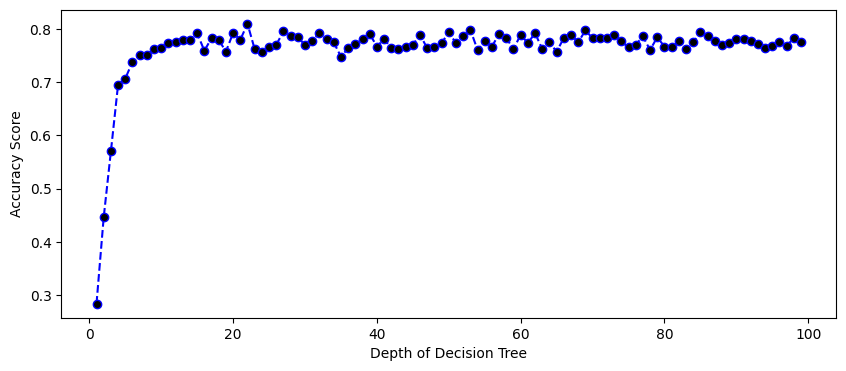

The optimal depth is: 22


In [5]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
groups = pars.iloc[:, 0].values

#Calculating accuracies for multiple tree depths
accuracy_scores = []
depth_range = range(1, 100)

#LOSO Cross-Validation
logo = LeaveOneGroupOut()

for depth in depth_range:

    #Initialize the accuracies for every participant of this depth
    acc=[]
    
    for train_index, test_index in logo.split(X, y, groups):
        
            # Split data into training and testing sets
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Fit tree classifier
            clf = tree.DecisionTreeClassifier(max_depth = depth)
            training = clf.fit(X_train,y_train)
            
            # Predictions
            predictions = clf.predict(X_test)

            # Save the accuracies of this depth to find the mean later
            acc.append(accuracy_score(y_test, predictions))
            
    # Save the accuracy of every depth for later comparison
    accuracy_scores.append(np.mean(acc))

# Ploting the Depth-Accuracy function plot
plt.figure(figsize=(10, 4))
plt.plot(depth_range, accuracy_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='black', markersize=6)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy Score')
plt.show()

# Select the "optimal max depth"
optimal_depth = depth_range[np.argmax(accuracy_scores)]
print('The optimal depth is:', optimal_depth)

#### $\cdot$ Μέθοδος  Δέντρων Απόφασης για optimal_depth$

Υπολογίζουμε πίνακα σύγχυσης και ορθότητα (accuracy) για το βέλτιστο μέγιστο βάθος που βρήκαμε παραπάνω.

Accuracy for participant Participant 1: 0.7301587301587301


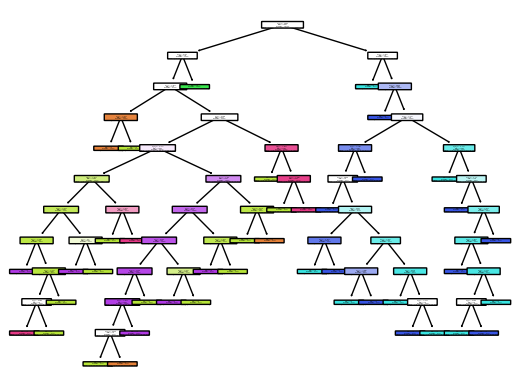

Accuracy for participant Participant 10: 0.9047619047619048


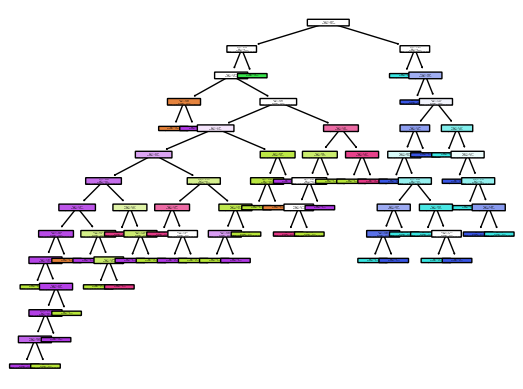

Accuracy for participant Participant 2: 0.8412698412698413


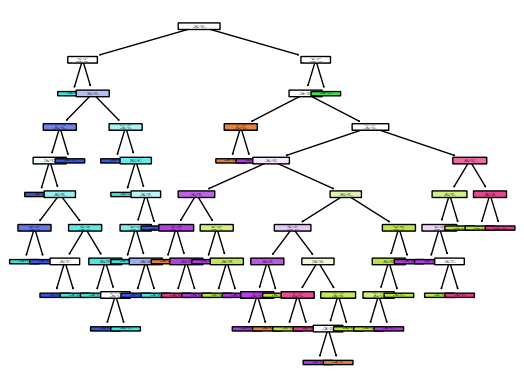

Accuracy for participant Participant 3: 0.8095238095238095


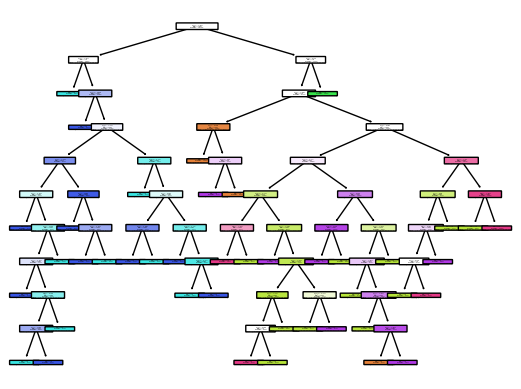

Accuracy for participant Participant 4: 0.8095238095238095


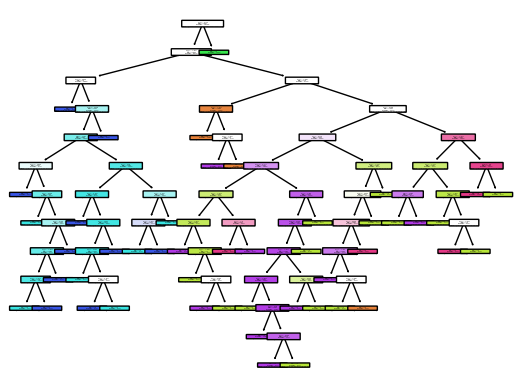

Accuracy for participant Participant 5: 0.6666666666666666


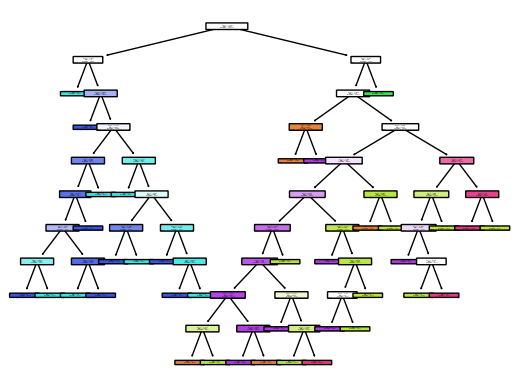

Accuracy for participant Participant 6: 0.9523809523809523


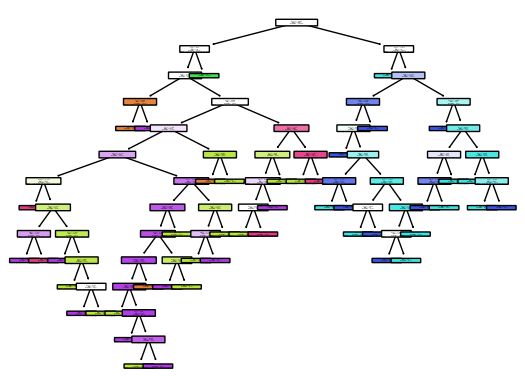

Accuracy for participant Participant 7: 0.6984126984126984


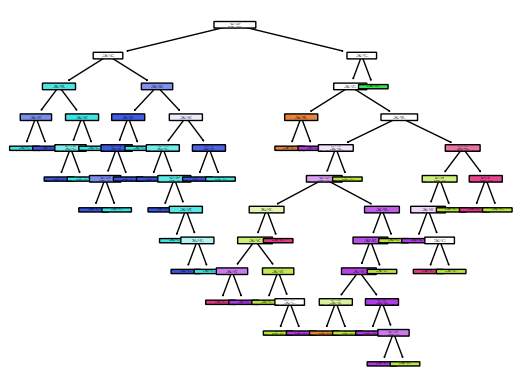

Accuracy for participant Participant 8: 0.6825396825396826


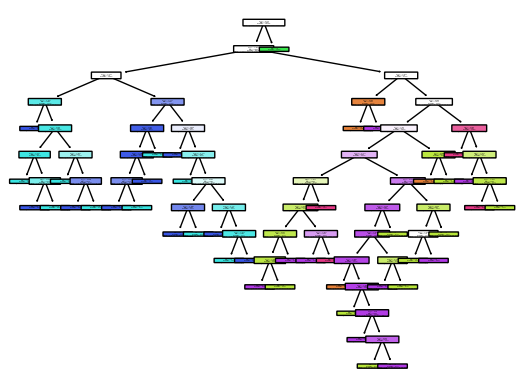

Accuracy for participant Participant 9: 0.8253968253968254


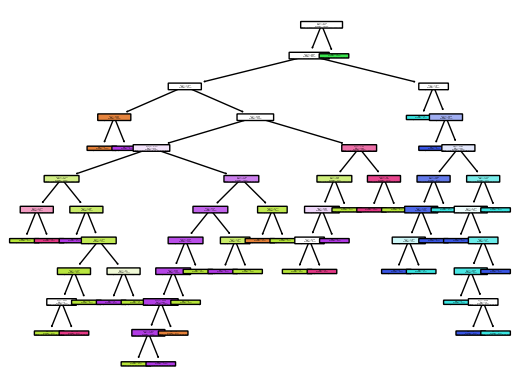


Total fit time: 0.06302833557128906 seconds

Overall accuracy: 0.792063492063492

Confusion matrix:

            biking  downstairs  jogging  sitting  standing  upstairs  walking
biking          84           1        0        0         1         4        0
downstairs       0          61        0        0         0        12       17
jogging          0           0       89        0         0         0        1
sitting          0           0        0       67        23         0        0
standing         0           0        0       29        61         0        0
upstairs         5          15        0        0         0        69        1
walking          0          20        0        0         0         2       68


In [6]:
#labels to predict
labels = np.unique(pars['Activity'])

#initialize
cm = np.zeros((len(np.unique(y)), len(np.unique(y))))

total_fit_time_DecisionTrees = 0  # Initialize total fit time

for train_index, test_index in logo.split(X, y, groups):
    
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Fit tree classifier
        import time
        start = time.time()
        clf = tree.DecisionTreeClassifier(max_depth = optimal_depth)
        training = clf.fit(X_train,y_train)
        end = time.time()
        fit_time = end - start  # Calculate fit time for this fold
        total_fit_time_DecisionTrees += fit_time  # Add fit time to total
        
        #predictions
        predictions = clf.predict(X_test)
        
        #Calculation of confusion matrices and accuracy  
        cm += confusion_matrix(y_test, predictions, labels=labels)
        acc = accuracy_score(y_test, predictions)
        
        #Print the results and plot the tree
        print(f"Accuracy for participant {groups[test_index][0]}: {acc}")
        
        # plot
        tree.plot_tree(clf,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples
        plt.show()

# Create DataFrame from confusion matrix and labels
cm_df = pd.DataFrame(cm.astype(int), columns=labels, index=labels)

# Print total fit time
print(f"\nTotal fit time: {total_fit_time_DecisionTrees} seconds")  

#Calculate overall accuracy and print confusion matrix
overall_acc_DecisionTrees = np.trace(cm) / np.sum(cm)
print(f"\nOverall accuracy: {overall_acc_DecisionTrees}")
print("\nConfusion matrix:\n")
print(cm_df)

### Σχόλια

1. Η μόνη παράμετρος που έχρηζε βελτιστοποίησης ήταν το max_depth. Ο τρόπος που βρέθηκε αυτή η παράμετρος φαίνεται στον παραπάνω κώδικα και η βέλτιστη παράμετρος υπολογίσθηκε ως optimal_depth = 22 στην περίπτωση μας. </br>


2. Τα ζητούμενα βρίσκονται στο προηγούμενο κελί κώδικα. </br>


3. Με βάση τον παραπάνω πίνακα ταξινόμησης, ο αλγόριθμος συγχέει: </br>
   -Την κλάση "standing" με την κλάση "sitting", κάτι που φαίνεται καθώς από τα 90 παράθυρα που έπρεπε να ταξινομηθούν ως standing, τα 61 ταξινομήθηκαν σωστά και όλα τα υπόλοιπα ταξινομήθηκαν ως "sitting" και όμοια αν συγκρίνουμε την κλάση "sitting" με την κλάση "standing". </br>
   -Σε αντίθεση με την μέθοδο kNN βλέπουμε ότι με αυτή τη μέθοδο, αν και πάλι υπάρχει σύγχηση του αλγορίθμου σχετικά με την φύση των "downstairs" και "upstairs", η σύγχηση δεν περιορίζεται μόνο μεταξύ αυτών των δύο κλάσεων. Πιο συγκεκριμένα, βλέπουμε ότι ένα ακόμα μεγαλύτερο μέρος των "downstairs" ταξινομείται εσφαλμένα και ως "walking". </br>
   
   Η πρώτη σύγχηση είναι λογική απόρια της χρήσης μόνο δεδομένων από το επιταχυνσιόμετρο και κατ' επέκταση του μέτρου αυτών των ενδείξεων. Έτσι, οι τιμές για τις κλάσεις "standing" και "sitting" θα 'ναι πολύ μικρές και παρόμοιας τάξης, με αποτέλεσμα να δυσκολεύουν να γίνει μια τέλεια ταξινόμηση. Αν και παρόμοια σκέψη γίνεται και για τις κλάσεις "upstairs" και "downstairs", αυτή δεν φτάνει για να εξηγήσει την επιπλέον σύγχηση με την κλάση "walking", στην περίπτωση του downstairs. Το καλύτερο που μπορούμε να υποθέσουμε σε αυτήν την περίπτωση είναι ότι ίσως γίνεται ένα μερικό overfighting του μοντέλου, το οποίο από τη μια μας δίνει καλύτερες προσεγγίσεις στις άλλες κλάσεις, αλλά από την άλλη δυσκολεύει την ταξινόμηση των περιπτώσεων "walking".

***

## <u> Μέθοδος SVM </u>

Η μέθοδος των Υποστηρικτικών Διανυσμάτων (Support Vector Machines - SVM) είναι μια αλγοριθμική τεχνική μηχανικής μάθησης με σκοπό την δημιουργία ενός υπερεπιπέδου στον χώρο των χαρακτηριστικών, που θα διαχωρίζει τις κατηγορίες των δεδομένων με τον καλύτερο δυνατό τρόπο με την βοήθεια των υποστηρικτικών διανυσμάτων, τα οποία είναι τα δείγματα που βρίσκονται πλησιέστερα στο υπερεπίπεδο και επηρεάζουν τη θέση και τον προσανατολισμό του.

Στο SVM, οι σημαντικές παράμετροι περιλαμβάνουν:
- Τον πυρήνα: Ορίζει τον τύπο του ορίου απόφασης, και στην περίπτωση μας ζητείται να είναι ο RBF (Radial Basis Function).
- Την παράμετρο C: Ρυθμίζει την ισορροπία ανάμεσα στο μέγεθος του περιθωρίου και την ακρίβεια της ταξινόμησης.
- Την παράμετρο γ: Ρυθμίζει το πόσο έντονα επηρεάζονται τα σημεία κοντά στο όριο απόφασης.

Συνεπώς, σκοπός μας είναι να βρούμε τις τιμές των C και γ που θα μας δώσουν την βέλτιστη απόδοση και έπειτα να εξάγουμε τα ζητούμενα αποτελέσματα, χρησιμοποιώντας αυτές.

### Προαπαιτούμενα

Πριν ξεκινήσουμε την εκπαίδευση πρέπει να γίνει η εισαγωγή των δεδομένων που παράχθηκαν με την χρήση του κώδικα του Notebook_1, καθώς και των modules που χρειάζονται:

In [7]:
# modules
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# data input
pars = pd.read_csv("pars_standardized.csv")

### LOSO Εκπαίδευση με SVM

#### $\cdot$ Εύρεση βέλτιστων C και gamma

Θα ξεκινήσουμε βρίσκοντας τις καλύτερες δυνατές τιμές για τα C και γ, χρησιμοποιώντας την GridSearchCV πάνω σε ένα προκαθορισμένο από εμάς φάσμα πιθανών τιμών για τις παραμέτρους. Περισσότερες πληροφορίες για το πως ακριβώς δουλεύει η GridSearchCV μπορούν να βρεθούν [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). </br>
Ακόμη, για τα επιμέρους βήματα έχουν δωθεί εξηγήσεις πάνω στον κώδικα σαν σχόλια.

* Το παρακάτω κελί κώδικα χρειάζεται μερικά λεπτά μέχρι να δώσει αποτέλεσμα.

In [8]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
groups = pars.iloc[:, 0].values

# Set up hyperparameter grid for grid search
param_grid = {'C': [ 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
              'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]}

# Initialize classifier and perform grid search to find optimal hyperparameters
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=LeaveOneGroupOut(), scoring='accuracy')
grid_search.fit(X, y, groups=groups)
print(f"Optimal hyperparameters: {grid_search.best_params_}")

Optimal hyperparameters: {'C': 10000000, 'gamma': 1e-06}


#### $\cdot$ Μέθοδος SVM για βέλτιστα C και γ

Υπολογίζουμε πίνακα σύγχυσης,ορθότητας (accuracy) και χρόνο εκπαίδευσης για τα βέλτιστα C και γ που βρήκαμε.
C=10000000 και γ=1e-06=0.000001.

In [9]:
# Initialize classifier with optimal hyperparameters
svm = SVC(kernel='rbf', C=10000000, gamma=0.000001)

# Initialize confusion matrix for each split
cm = np.zeros((len(np.unique(y)), len(np.unique(y))))

total_fit_time_SVM = 0  # Initialize total fit time
          
# Perform leave-one-subject-out cross validation
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(X, y, groups):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit SVM classifier and predict labels
    import time
    start = time.time()      
    svm.fit(X_train, y_train)
    end = time.time()
    fit_time = end - start  # Calculate fit time for this fold
    total_fit_time_SVM += fit_time  # Add fit time to total      
    y_pred = svm.predict(X_test)

    # Calculate confusion matrix and accuracy for this split
    labels = np.unique(pars['Activity'])
    cm += confusion_matrix(y_test, y_pred, labels=labels)

# Create DataFrame from confusion matrix and labels
cm_df = pd.DataFrame(cm.astype(int), columns=labels, index=labels)

# Print total fit time
print(f"\nTotal fit time: {total_fit_time_SVM} seconds")

# Calculate overall accuracy and print confusion matrix
overall_acc_SVM= np.trace(cm) / np.sum(cm)
print(f"\nOverall accuracy: {overall_acc_SVM}")
print("\nConfusion matrix:\n")
print(cm_df)


Total fit time: 0.07105827331542969 seconds

Overall accuracy: 0.8285714285714286

Confusion matrix:

            biking  downstairs  jogging  sitting  standing  upstairs  walking
biking          88           1        0        0         0         1        0
downstairs       0          78        0        0         0         5        7
jogging          0           0       90        0         0         0        0
sitting          0           0        0       57        33         0        0
standing         0           0        0       39        51         0        0
upstairs         1          11        0        0         0        78        0
walking          0          10        0        0         0         0       80


### Σχόλια

1. Η παράμετροι που έχρηζαν βελτιστοποίησης ήταν οι C και γ. Ο τρόπος που βρέθηκε αυτή η παράμετρος φαίνεται στον παραπάνω κώδικα και οι βέλτιστες παράμετροι υπολογίσθηκαν ως C=10000000 και γ=1e-06=0.000001 στην περίπτωση μας. </br>
   - Η υψηλή τιμή της παραμέτρου C σημαίνει ότι το μοντέλο θα προσπαθήσει να βρει ένα όριο απόφασης που να απομακρύνει τα περισσότερα δείγματα από τα labels τους, ακόμη και αν αυτό σημαίνει μικρότερο περιθώριο μεταξύ των κλάσεων. </br>
   - Η χαμηλή τιμή της παραμέτρου γ σημαίνει ότι το μοντέλο θα λάβει υπόψη του μόνο τα δείγματα πολύ κοντά στο όριο απόφασης και όχι και τα πιο μακρινά δείγματα. Αυτές οι παράμετροι μπορούν να δώσουν ένα αρκετά επιθετικό όριο απόφασης, με μικρό περιθώριο, αλλά με μεγάλη ακρίβεια στην ταξινόμηση των δειγμάτων. </br>


2. Τα ζητούμενα βρίσκονται στο προηγούμενο κελί κώδικα. </br>


3. Με βάση τον παραπάνω πίνακα ταξινόμησης, ο αλγόριθμος συγχέει: </br>
   -Την κλάση "standing" με την κλάση "sitting", κάτι που φαίνεται καθώς από τα 90 παράθυρα που έπρεπε να ταξινομηθούν ως standing, τα 51 ταξινομήθηκαν σωστά και όλα τα υπόλοιπα ταξινομήθηκαν ως "sitting" και όμοια για την περίπτωση του "sitting". </br>
   -Όσον αφορά τις κλάσεις "downstairs", "upstairs" & "walking", βλέπουμε ότι επικρατεί παρόμοια σύχηση με αυτή στη μέθοδο δέντρων απόφασης, αλλά σε πολύ μικρότερο βαθμό. </br>
   
   Τα αίτια των συγχήσεων είναι παρόμοια με αυτά που αναφέρθηκαν στην μέθοδο των δέντρων απόφασης.

---

## <u> Μέθοδος MLP </u>

Ως μέθοδο MLP (Multilayer Perceptron) αναφερόμαστε σε μια τεχνική μηχανικής μάθησης που βασίζεται στα νευρωνικά δίκτυα. </br>
Το MLP αποτελείται από τρία βασικά επίπεδα: το επίπεδο εισόδου, το ενδιάμεσο επίπεδο (ή πολλαπλά ενδιάμεσα επίπεδα) και το επίπεδο εξόδου. Οι νευρώνες σε κάθε επίπεδο συνδέονται με τους νευρώνες του επόμενου επιπέδου με βάρη, τα οποία καθορίζουν τη συνεισφορά κάθε νευρώνα στην τελική έξοδο του δικτύου. Κατά τη διαδικασία εκπαίδευσης, το MLP προσαρμόζει αυτά τα βάρη με βάση την αντιστοιχία μεταξύ των εισόδων και των επιθυμητών εξόδων. Χρησιμοποιείται μια συνάρτηση κόστους και ένας αλγόριθμος βελτιστοποίησης, όπως ο αλγόριθμος οπισθοδρόμησης (backpropagation), για να ρυθμίσει τα βάρη και να μειώσει το σφάλμα πρόβλεψης του δικτύου.

Όμοια είναι η περιγραφή της μεθόδου MLP με χρήση ορμής, η οποία μπορεί να περιγραφεί ως μια επέκταση του αλγορίθμου MLP που χρησιμοποιεί μια έξτρα παράμετρο γνωστή ως "ορμή" για τη βελτιστοποίηση της εκπαίδευσης του δικτύου. Η ορμή εισάγει έναν επιπλέον όρο στη διαδικασία ενημέρωσης των βαρών του δικτύου. Κατά την ενημέρωση, εκτός από την ανανέωση των βαρών βάσει της κλασικής ανάπτυξης προς την αντίθετη κατεύθυνση της κλίσης της συνάρτησης κόστους, λαμβάνεται υπόψη και η κατεύθυνση της προηγούμενης ανανέωσης βαρών. Αυτός ο επιπλέον όρος βοηθά στην επιτάχυνση της σύγκλισης του αλγορίθμου εκπαίδευσης και μπορεί να βοηθήσει στην αποφυγή τοπικών ελάχιστων.

Η μέθοδος MLP σε σχέση με τις προηγούμενες μεθόδους έχει πολλές παραμέτρους τις οποίες εμείς πρέπει να προσπαθήσουμε να βελτιστοποιήσουμε, όπως:
- Αριθμός Κρυφών Επιπέδων (Hidden Layers)
- Αριθμός Νευρώνων ανά Κρυφό Επίπεδο
- Συνάρτηση Ενεργοποίησης (activation function)
- Ρυθμός Μάθησης (learning rate)
- Ορμή (momentum)
- Αρχικοποίηση βάρους (weight initializer)
- Αριθμός batches (batch size)
- Αριθμός εποχών (epochs)
- Ρυθμός απόρριψης (dropout_rate)

Σχετικά με τον αριθμό των κρυφών επιπέδων, μας ζητείται να είναι είτε ένα είτε δύο, οπότε θα ψάξουμε ις βέλτιστες παραμέτρους και για τις δύο περίπτωσεις. Δεν θα αναφερθούμε με περισσότερες λεπτομέρειες στο τι ρυθμίζει η καθεμία από τις υπόλοιπες, απλά θα αναφέρουμε ότι σκοπός μας είναι η εύρεση τιμών για τις παραπάνω παραμέτρους που θα μας δώσουν την βέλτιστη απόδοση, και έπειτα η εξαγωγή των ζητούμενων αποτελεσμάτων, χρησιμοποιώντας αυτές.

### Προαπαιτούμενα

Πριν ξεκινήσουμε την εκπαίδευση πρέπει να γίνει η εισαγωγή των δεδομένων που παράχθηκαν με την χρήση του κώδικα του Notebook_1, καθώς και των modules που χρειάζονται:

In [10]:
# modules
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# data input
pars = pd.read_csv("pars_standardized.csv")

### LOSO Εκπαίδευση με MLP

#### $\cdot$ Εύρεση βέλτιστων παραμέτρων

Η έρευνα για τις βέλτιστες παραμέτρους θα γίνει ξεχωριστά για τις δύο περιπτώσεις:
1. MLP με χρήση ενός κρυφού επιπέδου
2. MLP με χρήση δύο κρυφών επιπέδων </br>

Έπειτα, θα συγκριθούν τα αποτελέσματα που δίνουν οι βέλτιστες παράμετροι σε κάθε περίπτωση και έτσι τελικά θα διαλέξουμε το βέλτιστο μοντέλο MLP. </br>

Για την εύρεση των βέλτιστων τιμών των παραμέτρων σε κάθε περίπτωση θα χρησιμοποιηθεί πάλι η GridSearchCV πάνω σε ένα προκαθορισμένο από εμάς φάσμα πιθανών τιμών για τις παραμέτρους. Περισσότερες πληροφορίες για το πως ακριβώς δουλεύει η GridSearchCV μπορούν να βρεθούν [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). </br>
Ακόμη, για τα επιμέρους βήματα έχουν δωθεί εξηγήσεις πάνω στον κώδικα σαν σχόλια.

* Τα παρακάτω κελιά κώδικα που κάνουν grid search χρειάζονται αρκετές ώρες μέχρι να δώσουν αποτέλεσμα.

##### - Περίπτωση ενός κρυφού επιπέδου

Στην περίπτωση του ενός κρυφού επιπέδου θα χρησιμοποιήσουμε το παρακάτω φάσμα τιμών για την εύρεση του βέλτιστου συνδυασμού τιμών παραμέτρων:

In [11]:
# Define the grid search parameters
param_grid_1 = {
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.7, 0.9],
    'neurons1': [64, 128, 256],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.1, 0.2],
    'weight_initializer': ['he_normal', 'glorot_uniform'],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100]
}

Έτσι, παρακάτω εφαρμόζουμε την έρευνα βέλτιστων τιμών για το παραπάνω φάσμα:

In [12]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
y_num = pd.get_dummies(y) # Instead of strings, we need numeric values for the classes in MLP

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=0.01, momentum=0.9, neurons1=128, neurons2=64, activation='relu', \
                 dropout_rate=0.0, weight_initializer='he_normal'):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=12, activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))
    sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create the KerasClassifier with the model-building function
model1 = KerasClassifier(build_fn=create_model, verbose=2)

grid1 = GridSearchCV(estimator=model1, param_grid=param_grid_1, cv=3, verbose=2, n_jobs=-1)
grid1 = grid1.fit(X, y_num)

# Summarize results
print(f"\nBest: {grid1.best_score_} using {grid1.best_params_}")

C:\Users\HP\AppData\Local\Temp\ipykernel_4708\1354051213.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn=create_model, verbose=2)


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
10/10 - 0s - loss: 1.7373 - accuracy: 0.5143 - 445ms/epoch - 44ms/step
Epoch 2/100
10/10 - 0s - loss: 2.1009 - accuracy: 0.7651 - 19ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 1.2105 - accuracy: 0.7746 - 18ms/epoch - 2ms/step
Epoch 4/100
10/10 - 0s - loss: 0.5171 - accuracy: 0.8206 - 18ms/epoch - 2ms/step
Epoch 5/100
10/10 - 0s - loss: 0.4547 - accuracy: 0.8079 - 17ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 0.4091 - accuracy: 0.8286 - 16ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 0.3961 - accuracy: 0.8032 - 16ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3661 - accuracy: 0.8222 - 18ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 0.3023 - accuracy: 0.8651 - 16ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 0.3177 - accuracy: 0.8413 - 16ms/epoch - 2ms/step
Epoch 11/100
10/10 - 0s - loss: 0.3222 - accuracy: 0.8429 - 16ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 0.2683 - accuracy: 0.8635 - 16ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s


Best: 0.8476190368334452 using {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 100, 'learning_rate': 0.1, 'momentum': 0.9, 'neurons1': 256, 'weight_initializer': 'he_normal'}


##### - Περίπτωση δύο κρυφών επιπέδων

Στην περίπτωση των δύο κρυφών επιπέδου θα χρησιμοποιήσουμε το παρακάτω φάσμα τιμών για την εύρεση του βέλτιστου συνδυασμού τιμών παραμέτρων:

In [13]:
# Define the grid search parameters
param_grid_2 = {
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.7, 0.9],
    'neurons1': [64, 128, 256],
    'neurons2': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.1, 0.2],
    'weight_initializer': ['he_normal', 'glorot_uniform'],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100]
}

Έτσι, παρακάτω εφαρμόζουμε την έρευνα βέλτιστων τιμών για το παραπάνω φάσμα:

In [14]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
y_num = pd.get_dummies(y) # Instead of strings, we need numeric values for the classes in MLP

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=0.01, momentum=0.9, neurons1=128, neurons2=64, activation='relu', dropout_rate=0.0, \
                 weight_initializer='he_normal'):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=12, activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))
    sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create the KerasClassifier with the model-building function
model2 = KerasClassifier(build_fn=create_model, verbose=2)

grid2 = GridSearchCV(estimator=model2, param_grid=param_grid_2, cv=3, verbose=2, n_jobs=-1)
grid2 = grid2.fit(X, y_num)

# Summarize results
print(f"\nBest: {grid2.best_score_} using {grid2.best_params_}")

Fitting 3 folds for each of 5832 candidates, totalling 17496 fits


C:\Users\HP\AppData\Local\Temp\ipykernel_4708\2194293168.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model, verbose=2)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
20/20 - 0s - loss: 1.1895 - accuracy: 0.5349 - 469ms/epoch - 23ms/step
Epoch 2/100
20/20 - 0s - loss: 0.6875 - accuracy: 0.6794 - 47ms/epoch - 2ms/step
Epoch 3/100
20/20 - 0s - loss: 0.5569 - accuracy: 0.7476 - 47ms/epoch - 2ms/step
Epoch 4/100
20/20 - 0s - loss: 0.5238 - accuracy: 0.7540 - 31ms/epoch - 2ms/step
Epoch 5/100
20/20 - 0s - loss: 0.4437 - accuracy: 0.8032 - 31ms/epoch - 2ms/step
Epoch 6/100
20/20 - 0s - loss: 0.4407 - accuracy: 0.7937 - 31ms/epoch - 2ms/step
Epoch 7/100
20/20 - 0s - loss: 0.4484 - accuracy: 0.7683 - 31ms/epoch - 2ms/step
Epoch 8/100
20/20 - 0s - loss: 0.4022 - accuracy: 0.8032 - 47ms/epoch - 2ms/step
Epoch 9/100
20/20 - 0s - loss: 0.4115 - accuracy: 0.8079 - 47ms/epoch - 2ms/step
Epoch 10/100
20/20 - 0s - loss: 0.3810 - accuracy: 0.8238 - 31ms/epoch - 2ms/step
Epoch 11/100
20/20 - 0s - loss: 0.3480 - accuracy: 0.8286 - 47ms/epoch - 2ms/step
Epoch 12/100
20/20 - 0s - loss: 0.3693 - accuracy: 0.8143 - 31ms/epoch - 2ms/step
Epoch 13/100
20/20 - 0s


Best: 0.8492063482602438 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 100, 'learning_rate': 0.1, 'momentum': 0.7, 'neurons1': 64, 'neurons2': 64, 'weight_initializer': 'glorot_uniform'}


#### $\cdot$ Μέθοδος MLP για τις βέλτιστες παραμέτρους

Από τα παραπάνω πειράματα έχουμε εξάγει τις βέλτιστες παραμέτρους μαζί με τα best_scores_ τους :

- Best: 0.8476190368334452 using {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 100, 'learning_rate': 0.1, 'momentum': 0.9, 'neurons1': 256, 'weight_initializer': 'he_normal'}

- Best: 0.8492063482602438 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 100, 'learning_rate': 0.1, 'momentum': 0.7, 'neurons1': 64, 'neurons2': 64, 'weight_initializer': 'glorot_uniform'}
                                
Όπως είναι φανερό από τα best_scores_, η βέλτιστη επιλογή θα ήταν η δεύτερη με δύο κρυφά επίπεδα και τις αντίστοιχες υπόλοιπες βέλτιστες παραμέτρους.

Υπολογίζουμε πίνακα σύγχυσης και ορθότητα (accuracy) για τα βέλτιστες παραμέτρους που υπολογίσαμε. </br>
Πιο συγκεκριμένα αυτές θα είναι οι:
- 'activation': 'relu', 
- 'batch_size': 64, 
- 'dropout_rate': 0.1, 
- 'epochs': 100, 
- 'learning_rate': 0.1, 
- 'momentum': 0.9, 
- 'neurons1': 64, 
- 'neurons2': 32, 
- 'weight_initializer': 'he_normal'

In [15]:
# Extract features and labels from data frame
X = pars.iloc[:, 2:14].values
y = pars.iloc[:, 1].values
y_num = pd.get_dummies(y) # Instead of strings, we need numeric values for the classes in MLP
groups = pars.iloc[:, 0].values
labels = np.unique(pars['Activity'])

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=grid2.best_params_['learning_rate'], momentum=grid2.best_params_['momentum'], \
                 neurons1=grid2.best_params_['neurons1'], neurons2=grid2.best_params_['neurons2'], \
                 activation=grid2.best_params_['activation'], dropout_rate=grid2.best_params_['dropout_rate'], \
                 weight_initializer=grid2.best_params_['weight_initializer']):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=12, activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))
    sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create the KerasClassifier with the model-building function
model = KerasClassifier(build_fn=create_model, verbose=1)

# LOSO Cross-Validation
logo = LeaveOneGroupOut()
cm = np.zeros((len(np.unique(y)), len(np.unique(y))))

total_fit_time_MLP = 0  # Initialize total fit time

# Perform LOSO cross-validation
for train_index, test_index in logo.split(X, y_num, groups):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the current training set
    import time
    start = time.time()
    model.fit(X_train, y_train, epochs=grid2.best_params_['epochs'], batch_size=grid2.best_params_['batch_size'], verbose=1)
    end = time.time()
    fit_time = end - start  # Calculate fit time for this fold
    total_fit_time_MLP += fit_time  # Add fit time to total
    
    # Predict labels for the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and confusion matrix
    cm += confusion_matrix(y_test, y_pred, labels=labels)

# Create DataFrame from confusion matrix and labels
cm_df = pd.DataFrame(cm.astype(int), columns=labels, index=labels)

# Print total fit time
print(f"\nTotal fit time: {total_fit_time_MLP} seconds")

# Calculate overall accuracy and print confusion matrix
overall_acc_MLP = np.trace(cm) / np.sum(cm)
print(f"\nOverall accuracy: {overall_acc_MLP}")
print("\nConfusion matrix:\n")
print(cm_df)

Epoch 1/100


C:\Users\HP\AppData\Local\Temp\ipykernel_4708\290633633.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1)


18/18 [==============================] - 0s 2ms/step - loss: 1.2237 - accuracy: 0.5097
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.7055
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7337
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7707
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7795
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8042
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7954
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8166
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.7813
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8201
Epoch 11/100
18/18 [=

18/18 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.8959
Epoch 64/100
18/18 [==============================] - 0s 919us/step - loss: 0.2005 - accuracy: 0.8854
Epoch 65/100
18/18 [==============================] - 0s 919us/step - loss: 0.2042 - accuracy: 0.8818
Epoch 66/100
18/18 [==============================] - 0s 919us/step - loss: 0.2038 - accuracy: 0.8942
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9030
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9030
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.8871
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.8959
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.8783
Epoch 72/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.8889
Epoch 7

18/18 [==============================] - 0s 919us/step - loss: 0.2580 - accuracy: 0.8642
Epoch 26/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8624
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.8765
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8695
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8818
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.8677
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8713
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8677
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.8818
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8695
Epoch 35/10

18/18 [==============================] - 0s 919us/step - loss: 0.1754 - accuracy: 0.8977
Epoch 88/100
18/18 [==============================] - 0s 919us/step - loss: 0.1663 - accuracy: 0.9012
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9030
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9030
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9101
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9012
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9012
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9083
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9259
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9153
Epoch 97/

18/18 [==============================] - 0s 919us/step - loss: 0.2462 - accuracy: 0.8801
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8748
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8677
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8413
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.8977
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8783
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.8818
Epoch 42/100
18/18 [==============================] - 0s 919us/step - loss: 0.2590 - accuracy: 0.8660
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8871
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.8889
Epoch 45/

18/18 [==============================] - 0s 919us/step - loss: 0.3064 - accuracy: 0.8554
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8660
Epoch 18/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8624
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8519
Epoch 20/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8660
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8571
Epoch 22/100
18/18 [==============================] - 0s 919us/step - loss: 0.2776 - accuracy: 0.8571
Epoch 23/100
18/18 [==============================] - 0s 919us/step - loss: 0.2557 - accuracy: 0.8765
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8836
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8783
Epoch 2

18/18 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9083
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9030
Epoch 80/100
18/18 [==============================] - 0s 919us/step - loss: 0.1803 - accuracy: 0.9030
Epoch 81/100
18/18 [==============================] - 0s 919us/step - loss: 0.1973 - accuracy: 0.9048
Epoch 82/100
18/18 [==============================] - 0s 918us/step - loss: 0.1898 - accuracy: 0.8959
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.8995
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9012
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.8907
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.8871
Epoch 87/100
18/18 [==============================] - 0s 919us/step - loss: 0.1822 - accuracy: 0.9030
Epoch

Epoch 59/100
18/18 [==============================] - 0s 919us/step - loss: 0.2181 - accuracy: 0.8942
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.8995
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9118
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.8907
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9012
Epoch 64/100
18/18 [==============================] - 0s 919us/step - loss: 0.1875 - accuracy: 0.9048
Epoch 65/100
18/18 [==============================] - 0s 920us/step - loss: 0.1697 - accuracy: 0.9189
Epoch 66/100
18/18 [==============================] - 0s 919us/step - loss: 0.1831 - accuracy: 0.9048
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.8730
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy:

### Σχόλια

1. Η παράμετροι που έχρηζαν βελτιστοποίησης έχουν αναφερθεί πιο πάνω και ο τρόπος που βρέθηκαν αυτοί οι παράμετροι φαίνεται στον παραπάνω κώδικα. </br>


2. Τα ζητούμενα βρίσκονται στο προηγούμενο κελί κώδικα. </br>


3. Με βάση τον παραπάνω πίνακα ταξινόμησης, ο αλγόριθμος συγχέει: </br>
   -Την κλάση "standing" με την κλάση "sitting", κάτι που φαίνεται καθώς από τα 90 παράθυρα που έπρεπε να ταξινομηθούν ως standing, τα 42 ταξινομήθηκαν σωστά και όλα τα υπόλοιπα ταξινομήθηκαν ως "standing" και όμοια για την περίπτωση του "sitting". </br>
   -Όσον αφορά τις κλάσεις "downstairs", "upstairs" & "walking", βλέπουμε ότι επικρατεί παρόμοια σύχηση με αυτή στη μέθοδο δέντρων απόφασης, αλλά σε μικρότερο βαθμό, ειδικά για την περίπτωση της κλάσης "upstairs" . </br>
   
   Τα αίτια των συγχήσεων είναι παρόμοια με αυτά που αναφέρθηκαν στην μέθοδο των δέντρων απόφασης.

---

## Σύγκριση Μεθόδων

- $k$**-Πλησιέστεροι γείτονες ($k$-NN)**: Είναι ένα απλό μοντέλο που μπορεί να είναι πολύ αποτελεσματικό εάν οι κλάσεις είναι καλά διαχωρισμένες στο χώρο των χαρακτηριστικών. Ωστόσο, μπορεί να είναι αργό στην πρόβλεψη εάν το σετ δεδομένων είναι πολύ μεγάλο και απαιτείται προσεκτική επιλογή της παραμέτρου k. </br>
  
  - Στην συγκεκριμένη άσκηση, το μοντέλο μας πέτυχε τις εξής τιμές: </br>
    Overall accuracy: 0.7523809523809524 </br>
    Total fit time: 0.01587677001953125 seconds </br>


- **Δένδρα απόφασης**: Παρέχουν μια πολύ ερμηνεύσιμη μέθοδο απόφασης. Ωστόσο, μπορεί να είναι υπερβολικά αυστηρά στον τρόπο που κάνει αποφάσεις (οριζόντια και κάθετα στον χώρο χαρακτηριστικών), το οποίο μπορεί να μην είναι καλό για μη γραμμικά διαχωρίσιμα δεδομένα. </br>

  - Στην συγκεκριμένη άσκηση, το μοντέλο μας πέτυχε τις εξής τιμές: </br>
    Overall accuracy: 0.792063492063492 </br>
    Total fit time: 0.06302833557128906 seconds </br>


- **SVM με πυρήνα RBF**: Εξαιρετικά αποτελεσματικό σε πολύπλοκους και μη γραμμικούς χώρους δεδομένων. Ωστόσο, η επιλογή του σωστού πυρήνα και της παραμέτρου για τον πυρήνα RBF μπορεί να είναι δύσκολη. Τέλος, τα SVMs μπορεί να είναι αργά στην εκπαίδευση για μεγάλα σετ δεδομένων. </br>

  - Στην συγκεκριμένη άσκηση, το μοντέλο μας πέτυχε τις εξής τιμές: </br>
    Overall accuracy: 0.8285714285714286 </br>
    Total fit time: 0.07105827331542969 seconds </br>
    

- **Νευρωνικό δίκτυο MLP**: Μπορεί να προσαρμοστεί σε πολύπλοκα μοτίβα και μη γραμμικούς χώρους, αλλά είναι πιο δύσκολο να εκπαιδευτεί και να ερμηνευτεί. Απαιτεί επίσης περισσότερους υπολογισμούς και χρόνο. </br>

  - Στην συγκεκριμένη άσκηση, το μοντέλο μας πέτυχε τις εξής τιμές: </br>
    Overall accuracy: 0.792063492063492 </br>
    Total fit time: 35.132901668548584 seconds </br>


Όσον αφορά τους πίνακες σύγχυσης, σε γενικές γραμμές όλες οι μέθοδοι αντιμετωπίζουν δυσκολία στην κατηγοριοποίηση κυρίως των κλάσεων "standing" - "sitting" και λίγο λιγότερο των "upstairs" - "downstairs". Επίσης, παρατηρούμε ότι στην περίπτωση όλων των μεθόδων εκτός της $k$nn, διαπιστώνεται μια επιπλέον σύγχυση μεταξύ των "upstairs" - "downstairs" & "walking".

Τέλος, για καλύτερη απεικόνιση των διαφορών ανάμεσα στις υλοποιήσεις μας των μοντέλων, παραθέτουμε και τα παρακάτω διαγράμματα που τις συγκρίνουν όσον αφορά (i) την ορθότητα και (ii) τον χρόνο προσαρμογής των μοντέλων.

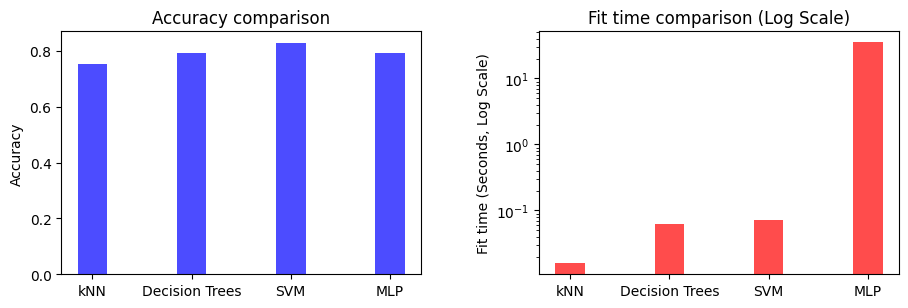

In [30]:
# Import modules for comparison
import matplotlib.pyplot as plt
import numpy as np

# Plot for Accuracy and fit time for each model
accuracy = [overall_acc_knn, overall_acc_DecisionTrees, overall_acc_SVM, overall_acc_MLP]
fit_time = [total_fit_time_knn, total_fit_time_DecisionTrees, total_fit_time_SVM, total_fit_time_MLP]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the accuracy comparison
ax1.bar(['kNN', 'Decision Trees', 'SVM', 'MLP'], accuracy, color='blue', alpha=0.7, width=0.3)
ax1.set_title('Accuracy comparison')
ax1.set_ylabel('Accuracy')

# Plot the fit time comparison
ax2.bar(['kNN', 'Decision Trees', 'SVM', 'MLP'], fit_time, color='red', alpha=0.7, width=0.3)
ax2.set_yscale('log')
ax2.set_title('Fit time comparison (Log Scale)')
ax2.set_ylabel('Fit time (Seconds, Log Scale)')

plt.tight_layout(pad=4)  # Adjust spacing between subplots
plt.show()